In [1]:
#necessary import
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, datasets, models

In [2]:
#Load fashion mnist dataset from tensorflow
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print('Shape of training dataset X_train:')
print(x_train.shape)
print('Shape of test dataset X_test:')
print(x_test.shape)

Shape of training dataset X_train:
(60000, 28, 28)
Shape of test dataset X_test:
(10000, 28, 28)


In [4]:
#reshape the traning data and test data 
# X_train and X_test contains the reshaped data
X_train = x_train.reshape(60000, 28, 28,1)
X_test = x_test.reshape(10000, 28, 28,1)

print('training and test data reshaped for tensor as 60000x28x28x1, 10000x28x28x1 respectively' )


training and test data reshaped for tensor as 60000x28x28x1, 10000x28x28x1 respectively


In [5]:
#normalizing the data 
X_train = X_train/255
X_test = X_test/255

In [6]:
#there are 10 classes in the dataset
classes = ["T-shirt/top", "Trouser", "Pullover",	"Dress", "Coat", 	"Sandal",	"Shirt",	"Sneaker", "Bag", "Ankle boot"]	

In [7]:
#define a function to show the image with its class name from the training dataset
def show_sample(X, y, index):
  plt.figure(figsize=(15,2)) #reducing the image size for clear imshow
  plt.imshow(X[index],cmap=plt.cm.binary)
  plt.xlabel('ClasseName: '+classes[y[index]])

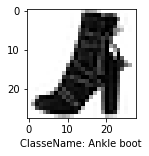

In [8]:
#show a sample from training images
show_sample(x_train, y_train, 11)

In [10]:
# creating the cnn model
cnn_model = models.Sequential([
                         #first set of conv+pooling with 32 filters of size 3x3
                         layers.Conv2D(filters=64, kernel_size= (3,3), activation='relu', input_shape= (28,28,1)),
                         layers.MaxPool2D(2,2),
                         #second set of conv+pooling with 32 filters of size 3x3
                         layers.Conv2D(filters=64, kernel_size= (3,3), activation='relu'), 
                         layers.MaxPool2D(2,2),

                         #flat after after conv+pooling
                         layers.Flatten(),
                         #dense layer with 64 neurons/units and relu activation function
                         layers.Dense(128, activation='relu'),

                         #last/output dense layer with 10 neurons/units since there are 10 y_train classes
                         #activation function is softmax for probality distribution
                         layers.Dense(10, activation='softmax')                    
                         ])

In [11]:
#add optimizer(adam) and loss function to cnn model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


In [12]:
#fit the cnn model/train data with cnn_model
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 6ms/step - loss: 0.4460 - accuracy: 0.8380
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2975 - accuracy: 0.8911
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2513 - accuracy: 0.9069
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2185 - accuracy: 0.9197
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1941 - accuracy: 0.9263
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1707 - accuracy: 0.9357
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1497 - accuracy: 0.9435
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1328 - accuracy: 0.9493
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1166 - accuracy: 0.9555
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [13]:
#save the model after training is done 
cnn_model.save('fashion_article_classification_cnn.model')

INFO:tensorflow:Assets written to: fashion_article_classification_cnn.model/assets


In [14]:
#reshape y_test
y_test=y_test.reshape(-1,)
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

Class Index: 4


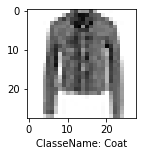

In [15]:
#show an image with its classname from test samples using show_sample() function defined above 
# for showing sample x_test(without reshaping) instead of X_test is used 
print('Class Index: '+str(y_test[10]))
show_sample(x_test, y_test, 10) 

In [16]:
#load the pretrained model which is saved here after training
trained_cnn_model = models.load_model('fashion_article_classification_cnn.model')

In [18]:
#use trained_cnn_model to predict the x_test
predictions = trained_cnn_model.predict([X_test])

In [19]:
# Check the y value(class_index) prediction for the index 10 of x_test which lies in predictions[10]
print('ClassIndex for sample in X_test[10]:'+str(np.argmax(predictions[10])))
classindex= int(np.argmax(predictions[10]))
print('ClassName: '+classes[classindex])


ClassIndex for sample in X_test[10]:4
ClassName: Coat


Prediction from thr cnn model matches with the image class

In [20]:
#evaluate overall performance of the cnn_model
(validation_loss, validation_accuracy) = trained_cnn_model.evaluate(X_test, y_test)
print('Loss: '+ str(validation_loss))
print('accuracy: '+ str(validation_accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.2937 - accuracy: 0.9113
Loss: 0.2937049865722656
accuracy: 0.911300003528595
